In [3]:
from sklearn.neighbors import KernelDensity
from sklearn import mixture
from scipy.stats import norm
import seaborn as sns
from scipy.signal import argrelextrema

In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('g3.csv')
df.head()

,Date,Frame No,BAT,COND,DO,ORP,PH,WT,Cluster,Unnamed: 9,ADD
0,21-05-19 11:53,0,98,1.620359,97.282104,0.137211,10.061290,28.213074,2,NaN,137.314039
1,21-05-19 11:54,1,96,1.586915,97.476720,0.135318,10.035237,28.137848,2,NaN,137.372038
2,21-05-19 11:55,2,96,1.558073,97.546370,0.134258,10.022614,28.149506,2,NaN,137.410821
3,21-05-19 11:56,3,96,1.536727,97.521300,0.133044,10.019047,28.144989,2,NaN,137.355106
4,21-05-19 11:57,4,98,1.510011,97.643640,0.132248,10.018088,28.144043,2,NaN,137.448031


In [6]:
X = df[['COND','DO','ORP','PH','WT']]
X

,COND,DO,ORP,PH,WT
0,1.620359,97.282104,0.137211,10.061290,28.213074
1,1.586915,97.476720,0.135318,10.035237,28.137848
2,1.558073,97.546370,0.134258,10.022614,28.149506
3,1.536727,97.521300,0.133044,10.019047,28.144989
4,1.510011,97.643640,0.132248,10.018088,28.144043
...,...,...,...,...,...
4974,76.474670,101.003090,-0.284334,9.963284,26.190490
4975,76.304344,101.060036,-0.281613,9.960735,26.205017
4976,76.132810,100.933650,-0.278773,9.958983,26.215302
4977,76.036200,100.961590,-0.275675,9.962255,26.193726


In [7]:
#ph pdf
ph=X['PH']
mu, std = norm.fit(ph)

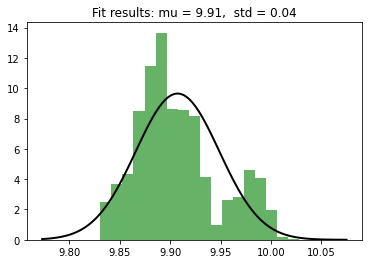

In [8]:
plt.hist(ph, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

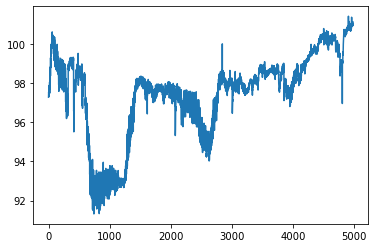

In [9]:
plt.plot(X['DO'])

In [10]:
#do
do = X['DO']
#do = do.reset_index(drop=True)
do_pdf_1 = np.zeros([4979,1])
do=np.asarray(do)
do=np.reshape(do,(4979,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(do)
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
for i in range(0, 4979):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((do[i] - mu)/sigma, 2)/2)
    do_pdf_1[i] = x
do_pdf_1

array([[0.18521202],
       [0.18572232],
       [0.18553478],
       ...,
       [0.04964754],
       [0.04860529],
       [0.04280131]])

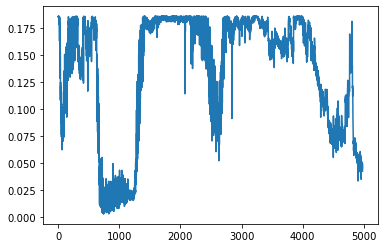

In [11]:
plt.plot(do_pdf_1)

In [43]:
X.describe()

,COND,DO,ORP,PH,WT
count,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000
mean,5.438225,97.444631,0.038414,9.907353,27.256468
std,15.872706,2.148034,0.147417,0.041337,0.723825
min,1.027458,91.319470,-0.321911,9.786758,25.761750
25%,1.049468,96.833060,-0.034718,9.879156,26.759094
50%,1.051255,97.891520,0.090710,9.898420,27.168182
75%,1.057324,98.699337,0.160530,9.927725,27.706330
max,139.701980,101.416990,0.212436,10.061290,29.131622


In [51]:
ip=[]
ip=X['DO'].values
#ip=np.unique(X['DO'].values)

In [52]:
ip.shape

(4979,)

In [54]:
ip=np.reshape(ip, (4979, 1))

In [55]:
#xx=argrelextrema(ip, np.greater)

In [58]:
#xx

(array([   2,    4,    6, ..., 4970, 4972, 4975], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32))

In [57]:
np.shape(xx)

(2, 1611)

In [73]:
#sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

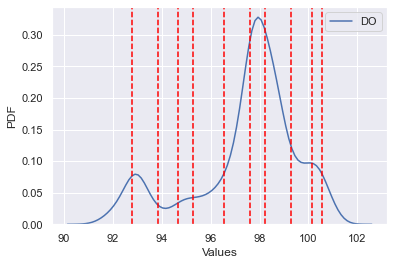

In [75]:
ax = sns.kdeplot(X['DO'])
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
ax.set(xlabel="Values", ylabel = "PDF")
plt.axvline(92.78, color='red',linestyle="--")
plt.axvline(93.83, color='red',linestyle="--")
plt.axvline(94.67, color='red',linestyle="--")
plt.axvline(95.3, color='red',linestyle="--")
plt.axvline(96.56, color='red',linestyle="--")
plt.axvline(97.61, color='red',linestyle="--")
plt.axvline(98.24, color='red',linestyle="--")
plt.axvline(99.29, color='red',linestyle="--")
plt.axvline(100.13, color='red',linestyle="--")
plt.axvline(100.55, color='red',linestyle="--")

array([0.00560909, 0.00934848, 0.0215015 , 0.02804544, 0.03178483,
       0.04954694, 0.08787571, 0.12807418, 0.08974541, 0.05515603,
       0.03271968, 0.01682726, 0.0215015 , 0.01589242, 0.01963181,
       0.03832877, 0.04954694, 0.0448727 , 0.03645907, 0.04767725,
       0.03926362, 0.04393786, 0.05609088, 0.05796058, 0.06824391,
       0.10189843, 0.10002874, 0.16172871, 0.22623322, 0.39637556,
       0.40665889, 0.39824525, 0.21594989, 0.28793319, 0.2823241 ,
       0.14957568, 0.10096359, 0.07478784, 0.10376813, 0.08694087,
       0.08226663, 0.12713933, 0.12713933, 0.04767725, 0.06543936,
       0.01402272, 0.0018697 ])

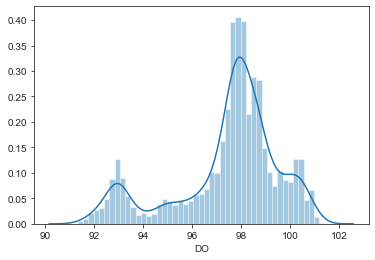

In [68]:
do=[]
for h in sns.distplot(X['DO']).patches: 
    do.append(h.get_height())
do=np.array(do)
do

In [69]:
do.shape

(47,)

In [70]:
#do minima 
argrelextrema(do, np.greater)

# for local minima
#argrelextrema(do, np.less)

(array([ 7, 12, 16, 19, 25, 30, 33, 38, 42, 44], dtype=int32),)

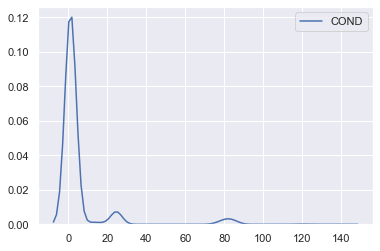

In [76]:
sns.kdeplot(X['COND'])

array([3.22900467e-01, 1.23106256e-03, 3.62077223e-04, 8.68985335e-04,
       1.59313978e-03, 7.96569890e-04, 5.79323556e-04, 5.79323556e-04,
       1.80314457e-02, 1.08623167e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.24154446e-05, 1.95521700e-03,
       2.82420234e-03, 4.34492667e-03, 2.82420234e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.17246334e-04, 1.44830889e-04,
       0.00000000e+00, 7.24154446e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.24154446e-05])

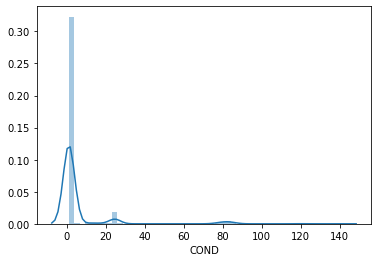

In [16]:
#COND pdf
cond=[]
for h in sns.distplot(X['COND']).patches: 
    cond.append(h.get_height())
cond=np.array(cond)
cond

In [77]:
cond.shape

(50,)

In [83]:
cond=np.reshape(cond,(50,1))

In [86]:
dff = pd.DataFrame(cond,index=cond[:,0])

In [87]:
dff.to_csv('COND1.csv')

In [81]:
#do minima 
argrelextrema(cond, np.greater)

# for local minima
#argrelextrema(cond, np.less)

(array([ 4,  8, 29, 42, 45], dtype=int32),)

array([ 0.03584767,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.07543022,  4.19417784,
        4.08663482,  3.40552902,  3.90739645,  6.3091906 ,  8.13742197,
        8.89022312, 10.32413007, 14.33906955, 16.05975789,  9.24869986,
        9.24869986,  7.20538245,  8.31666034, 10.07319636,  7.88648825,
        7.42046849,  3.22629065,  1.57729765,  1.07543022,  1.29051626,
        2.25840345,  4.6601976 ,  1.86407904,  4.94697899,  4.05078715,
        4.01493947,  4.19417784,  2.90366158,  1.68484067,  0.17923837,
        0.1433907 ,  0.1433907 ,  0.03584767,  0.        ,  0.03584767,
        0.        ,  0.        ,  0.        ,  0.03584767])

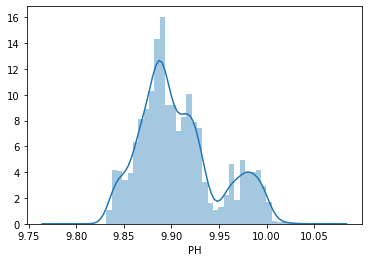

In [34]:
ph=[]
for h in sns.distplot(X['PH']).patches: 
    ph.append(h.get_height())
ph=np.array(ph)
ph

In [38]:
#do minima 
argrelextrema(ph, np.greater)

# for local minima
argrelextrema(ph, np.less)

(array([11, 21, 28, 32, 35, 43], dtype=int32),)

array([0.08129406, 0.14411221, 0.11270314, 0.1219411 , 0.20877794,
       0.38245162, 0.19214961, 0.23094905, 0.65774289, 1.01987099,
       0.37136607, 0.55612531, 0.60046752, 0.6060103 , 0.60970549,
       0.52656383, 0.26051053, 0.24388219, 0.33626181, 0.2180159 ,
       0.22910146, 0.22355868, 0.18475924, 0.22910146, 0.21062553,
       0.10900795, 0.11639832, 0.0960748 , 0.10716036, 0.11085554,
       0.10161758])

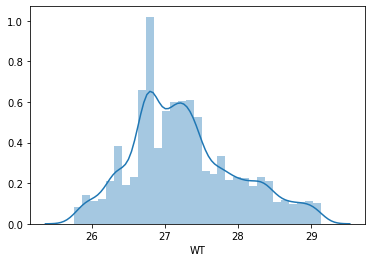

In [39]:
wt=[]
for h in sns.distplot(X['WT']).patches: 
    wt.append(h.get_height())
wt=np.array(wt)
wt

In [40]:
#WT minima 
argrelextrema(wt, np.greater)

# for local minima
argrelextrema(wt, np.less)

(array([ 2,  6, 10, 17, 19, 22, 25, 27], dtype=int32),)

array([1.44332914, 0.09922888, 1.82220305, 0.99228879, 1.1366217 ,
       0.81187264, 0.45104036, 0.23454099, 0.24356179, 0.16237453,
       0.6314565 , 1.18172574, 2.32736825, 2.85959587, 2.03870242,
       1.69591174, 1.28095462, 1.70493255, 2.71526295, 2.69722134,
       4.0323008 , 5.10577685, 7.40608267, 1.84024466])

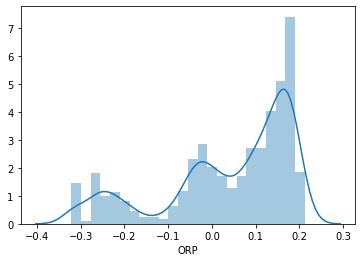

In [42]:
orp=[]
for h in sns.distplot(X['ORP']).patches: 
    orp.append(h.get_height())
orp=np.array(orp)
orp

In [43]:
#WT minima 
argrelextrema(orp, np.greater)

# for local minima
argrelextrema(orp, np.less)

(array([ 1,  3,  7,  9, 16, 19], dtype=int32),)

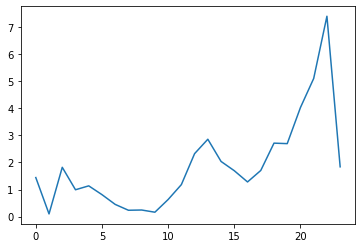

In [44]:
plt.plot(orp)